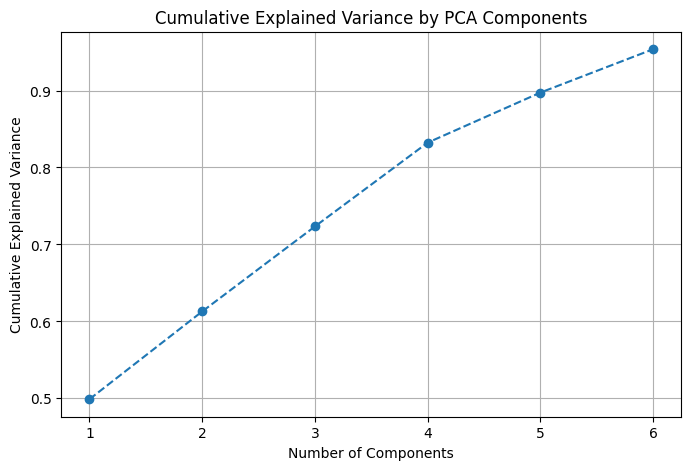

Number of components retained: 6
Explained variance by each component: [0.49886281 0.11402506 0.11045304 0.10891188 0.0650608  0.05636322]
        PC1       PC2       PC3       PC4       PC5       PC6
0  2.918010 -0.786042  0.908687 -0.059927 -2.516801  0.387671
1 -1.275304 -0.177065 -1.110494 -1.518489 -0.105827 -0.370977
2  3.210459 -0.599451 -1.018661  1.261721 -0.205879 -1.926285
3  2.473858  0.839491 -0.442681 -0.190136  1.396738 -0.421070
4  2.445725  0.495872 -1.383022  1.996289 -0.026015  0.113435


In [1]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt



# Step 1: Load and Inspect the Data
# Assuming `loan_master` is your dataset
loan_master = pd.read_csv(r"C:\Users\Varuni Singh\Downloads\Flask\Flask\loan_approval_dataset.csv")

# Step 2: Preprocess the Dataset
# Drop non-numeric or irrelevant columns (e.g., 'loan_id', 'loan_status')
loan_master = loan_master.drop(columns=['loan_id', 'loan_status'], errors='ignore')

# Select only numeric columns (explicitly exclude string or object columns)
numeric_data = loan_master.select_dtypes(include=['number']).copy()

# Fill missing values in numeric columns with the mean
numeric_data = numeric_data.fillna(numeric_data.mean())

# Step 3: Scale the Features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data)

# Step 4: Apply PCA
pca = PCA(n_components=0.95)  # Retain 95% of the variance
pca_transformed_data = pca.fit_transform(scaled_data)

# Step 5: Visualize Explained Variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1),
         pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.title("Cumulative Explained Variance by PCA Components")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid()
plt.show()

# Step 6: Display Results
print(f"Number of components retained: {pca.n_components_}")
print(f"Explained variance by each component: {pca.explained_variance_ratio_}")

# Reduced dataset
reduced_data = pd.DataFrame(pca_transformed_data, columns=[f'PC{i+1}' for i in range(pca.n_components_)])
print(reduced_data.head())

# Optional: Save the reduced dataset
reduced_data.to_csv('reduced_loan_data.csv', index=False)


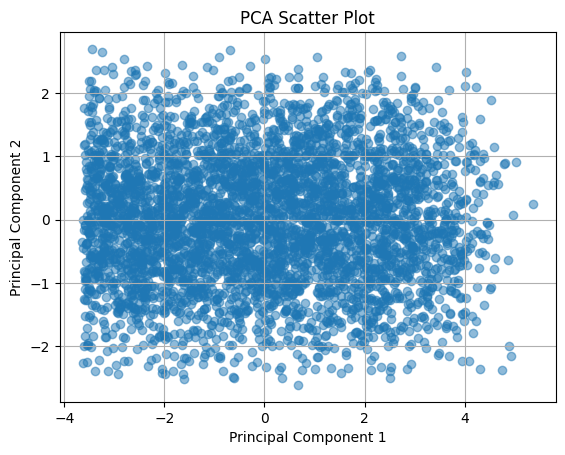

In [ ]:
plt.scatter(reduced_data['PC1'], reduced_data['PC2'], alpha=0.5)
plt.title("PCA Scatter Plot")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid()
plt.show()
